<a href="https://colab.research.google.com/github/SarahSouzaPontes/GaussianNaiveBayes/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/gaussian_nb.csv')
df

,age,y
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0
...,...,...
41183,73,1
41184,46,0
41185,56,0
41186,44,1


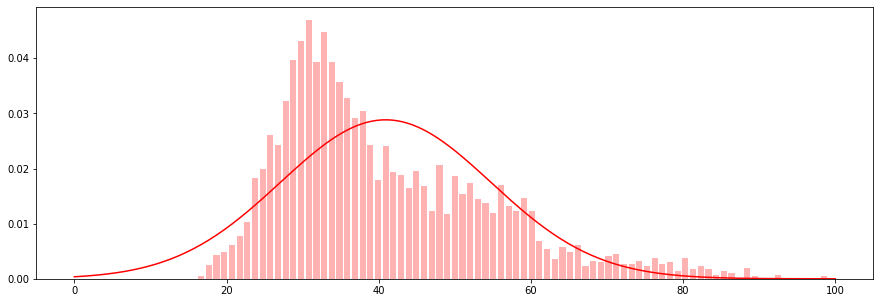

In [4]:
media_1 = df.loc[df.y==1].age.mean()
std_1 = df.loc[df.y==1].age.std()

plt.figure(figsize=(15,5))
plt.hist(df.loc[df.y==1].age, rwidth=.8, bins=np.linspace(0,100,100), color='r', alpha=.3, density=True)

from scipy.stats import norm

x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_1, std_1),'r-')

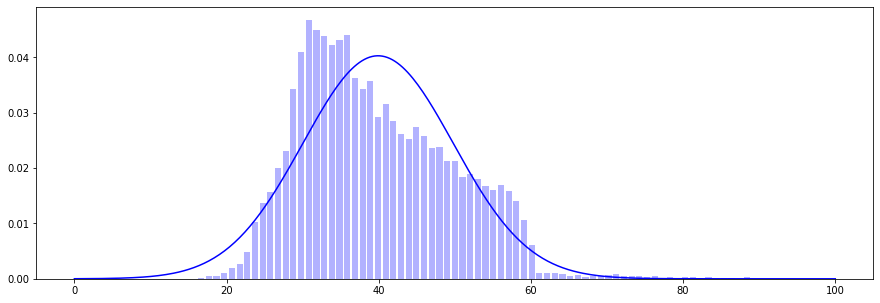

In [5]:
media_0 = df.loc[df.y==0].age.mean()
std_0 = df.loc[df.y==0].age.std()

plt.figure(figsize=(15,5))
plt.hist(df.loc[df.y==0].age, rwidth=.8, bins=np.linspace(0,100,100), color='b', alpha=.3, density=True)

from scipy.stats import norm

x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_0, std_0),'b-')

In [6]:
norm.pdf(30,media_0,std_0)

0.024413861387616222

In [8]:
norm.pdf(30,media_1, std_1)

0.021124619530361655

In [7]:
norm.pdf(70,media_0,std_0)

0.0003969810320236849

In [9]:
norm.pdf(70,media_1,std_1)

0.0031650267052752493

In [10]:
idade = 30

pr_y_1 = (df.y==1).sum() / df.shape[0]
pr_y_0 = (df.y==0).sum() / df.shape[0]

pr_y_1_idade_30_nonnormed = norm.pdf(30,media_1,std_1)*pr_y_1
pr_y_0_idade_30_nonnormed = norm.pdf(30,media_0,std_0)*pr_y_0

cte = (pr_y_1_idade_30_nonnormed+pr_y_0_idade_30_nonnormed)

pr_y_1_idade_30 = pr_y_1_idade_30_nonnormed/cte
pr_y_0_idade_30 = pr_y_0_idade_30_nonnormed/cte

Quando a pessoa tem 30 anos a probabilidade dela não comprar é de 90% e de 
comprar aproximadamente 10%

In [11]:
pr_y_0_idade_30,pr_y_1_idade_30

(0.9010212798993329, 0.09897872010066715)

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(df[['age']],df.y)

GaussianNB()

In [13]:
para_predizer = pd.DataFrame([30],columns=['age'])
para_predizer

,age
0,30


In [14]:
gnb.predict_proba(para_predizer)

array([[0.90101764, 0.09898236]])

In [ ]:
pr_y_0_idade_30,pr_y_1_idade_30